<a href="https://colab.research.google.com/github/FranciniSantana/Data-Analysis-With-Python-FreeCodeCamp/blob/main/Projeto_%7C_US_Stores_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 👜 Projeto | US Stores Sales

# 1. Contexto
Venho estudado Python por ser uma linguagem de programação muito utilizada por analistas e cientistas de dados além de ser considerada uma linguagem fácil para começar.

# 2. Objetivo
O objetivo desse projeto é aplicar os conhecimentos de Python associado ao processo de `Análise de Dados`. 

As principais fontes de estudo tem sido através:

- **Curso** [Python for Data Analysis - FreeCodeCamp ](https://www.freecodecamp.org/learn/data-analysis-with-python/)

- **Livro** [Hands-On Data Analysis with Pandas](https://www.amazon.com/Hands-Data-Analysis-Pandas-visualization/dp/1789615321)

- **Livro** [Pense Python](https://www.amazon.com/Pense-Python-cientista-computa%C3%A7%C3%A3o-Portuguese-ebook/dp/B07QL2LKBG/ref=sr_1_1?crid=29ABXBYXFN4N2&keywords=pense+python&qid=1669032627&s=books&sprefix=pense+python%2Cstripbooks-intl-ship%2C261&sr=1-1)

- **Artigos Complementares**
- Documentação [Pandas](https://pandas.pydata.org/docs/) e [Matplotlib](https://matplotlib.org/stable/api/index.html)

# 3. Preparação do ambiente
Em Python para Análise de Dados iremos trabalhar com diferentes bibliotecas para trabalhar com objetos específicos como tabelas e gráficos, portanto precisamos importá-las inicialmente para garantir que quando chamarmos as funções e métodos, não teremos nenhum problema.

In [1]:
import numpy as np # porque é sempre bom importar caso necessite de alguma função
import pandas as pd # para analisar dados de tabelas
import matplotlib.pyplot as plt # para criar/plotar gráficos


# 4. Data collection

A coleta de dados é o primeiro passo para uma análise de dados. Afinal não dá para analisar dados se não temos dados. 

> Para iniciar este projeto escolhi a base `US Stores Sales` no [Kaggle](https://www.kaggle.com/datasets/dsfelix/us-stores-sales).

> A escolha desse tipo de base ocorreu pois atuo com empresas de varejo online (e-commerces) e mais se assemelha com o tipo de dado que trabalho.








Passo 01: Trazer a base de dados para o ambiente de trabalho em Python.


In [2]:
# Por trabalhar com Google Colaboratory, um ambiente na nuvem, vamos usar o google drive para armazenar o arquivo e termos um path tbm na nuvem.

from google.colab import drive #importando da biblioteca do google colab a função drive para conseguir ler a tabela que eu subi no meu drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Bases/sales.csv',parse_dates = True) #usando uma função do pandas consigo ler esse arquivo de exemplo que subi no meu drive


In [4]:
df

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Date,Product Type,Product,Type
0,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,962.0,110.0,110.0,160.0,270.0,2,04/01/10 00:00:00,Coffee,Columbian,Regular
1,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,07/01/10 00:00:00,Coffee,Columbian,Regular
2,203,Connecticut,East,Small Market,122.0,195.0,325.0,130.0,73.0,42.0,1134.0,130.0,110.0,180.0,290.0,2,11/01/10 00:00:00,Coffee,Columbian,Regular
3,203,Connecticut,East,Small Market,105.0,174.0,289.0,115.0,69.0,37.0,1166.0,110.0,100.0,160.0,260.0,2,12/01/10 00:00:00,Coffee,Columbian,Regular
4,203,Connecticut,East,Small Market,104.0,135.0,223.0,90.0,56.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,07/01/11 00:00:00,Coffee,Columbian,Regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4243,985,Louisiana,South,Small Market,-6.0,66.0,113.0,47.0,72.0,42.0,-395.0,0.0,40.0,50.0,90.0,4,07/01/10 00:00:00,Espresso,Caffe Latte,Regular
4244,985,Louisiana,South,Small Market,-7.0,61.0,105.0,44.0,68.0,39.0,-508.0,10.0,30.0,60.0,90.0,4,08/01/10 00:00:00,Espresso,Caffe Latte,Regular
4245,985,Louisiana,South,Small Market,-3.0,76.0,131.0,55.0,79.0,49.0,-1053.0,0.0,40.0,60.0,100.0,4,12/01/10 00:00:00,Espresso,Caffe Latte,Regular
4246,985,Louisiana,South,Small Market,1.0,87.0,160.0,63.0,86.0,57.0,37.0,0.0,50.0,70.0,120.0,4,04/01/11 00:00:00,Espresso,Caffe Latte,Regular


# Data wrangling

`Data wrangling` is the process of preparing the data and getting it into a format that can be used for analysis. The unfortunate reality of data is that it is often dirty,meaning that it requires **cleaning** (preparation) before it can be used. The following are some issues we may encounter with our data:




- **Human errors**: Data is recorded (or even collected) incorrectly, such as putting 100 instead of 1000, or typos. In addition, there may be multiple versions of the same entry recorded, such as New York City, NYC, and nyc

- **Computer error:** Perhaps we weren't recording entries for a while (missing data)

- **Unexpected values:** Maybe whoever was recording the data decided to use ? for a missing value in a numeric column, so now all the entries in the column will be treated as text instead of numeric values

- **Incomplete information:** Think of a survey with optional questions; not everyone will answer them, so we have missing data, but not due to computer or human error

- **Resolution:** The data may have been collected per second, while we need hourly data for our analysis

- **Relevance of the fields:** Often, data is collected or generated as a produc of some process rather than explicitly for our analysis. In order to get it to a usable state, we will have to clean it up

- **Format of the data:** The data may be recorded in a format that isn't conducive to analysis, which will require that we reshape it

- **Misconfigurations in data-recording process:** Data coming from sources such as misconfigured trackers and/or webhooks may be missing fields or passing them in the wrong orde



> *Trecho retirado do livro: Data Analysis With Pandas 2019*

In [5]:
df.info() # checando os tipos de dados e valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area Code       4248 non-null   int64  
 1   State           4248 non-null   object 
 2   Market          4248 non-null   object 
 3   Market Size     4248 non-null   object 
 4   Profit          4248 non-null   float64
 5   Margin          4248 non-null   float64
 6   Sales           4248 non-null   float64
 7   COGS            4248 non-null   float64
 8   Total Expenses  4248 non-null   float64
 9   Marketing       4248 non-null   float64
 10  Inventory       4248 non-null   float64
 11  Budget Profit   4248 non-null   float64
 12  Budget COGS     4248 non-null   float64
 13  Budget Margin   4248 non-null   float64
 14  Budget Sales    4248 non-null   float64
 15  ProductId       4248 non-null   int64  
 16  Date            4248 non-null   object 
 17  Product Type    4248 non-null   o

In [6]:
df.describe() #checando as estatísticas descritiva de cada coluna

,Area Code,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId
count,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000
mean,582.278013,61.097693,104.293315,192.987524,84.433145,54.063559,31.185028,749.381356,60.913371,74.830508,100.819209,175.649718,6.887006
std,221.140310,101.708546,94.342522,151.133127,67.249769,32.352598,27.023264,661.031896,79.546123,66.238145,92.602725,148.891522,3.664072
min,203.000000,-638.000000,-302.000000,17.000000,0.000000,10.000000,0.000000,-3534.000000,-320.000000,0.000000,-210.000000,0.000000,1.000000
25%,417.000000,17.000000,52.750000,100.000000,43.000000,33.000000,13.000000,432.000000,20.000000,30.000000,50.000000,80.000000,4.000000
50%,573.000000,40.000000,76.000000,138.000000,60.000000,46.000000,22.000000,619.000000,40.000000,50.000000,70.000000,130.000000,6.000000
75%,772.000000,92.000000,132.000000,230.000000,100.000000,65.000000,39.000000,910.500000,80.000000,90.000000,130.000000,210.000000,10.000000
max,985.000000,778.000000,613.000000,912.000000,364.000000,190.000000,156.000000,8252.000000,560.000000,450.000000,690.000000,1140.000000,13.000000


In [7]:
from pandas.core.tools.datetimes import to_datetime
df['Date'] = pd.to_datetime(df['Date']) # alterando o tipo de valor para datetime

In [8]:
df.head(5)

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Date,Product Type,Product,Type
0,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,962.0,110.0,110.0,160.0,270.0,2,2010-04-01,Coffee,Columbian,Regular
1,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,2010-07-01,Coffee,Columbian,Regular
2,203,Connecticut,East,Small Market,122.0,195.0,325.0,130.0,73.0,42.0,1134.0,130.0,110.0,180.0,290.0,2,2010-11-01,Coffee,Columbian,Regular
3,203,Connecticut,East,Small Market,105.0,174.0,289.0,115.0,69.0,37.0,1166.0,110.0,100.0,160.0,260.0,2,2010-12-01,Coffee,Columbian,Regular
4,203,Connecticut,East,Small Market,104.0,135.0,223.0,90.0,56.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,2011-07-01,Coffee,Columbian,Regular


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Area Code       4248 non-null   int64         
 1   State           4248 non-null   object        
 2   Market          4248 non-null   object        
 3   Market Size     4248 non-null   object        
 4   Profit          4248 non-null   float64       
 5   Margin          4248 non-null   float64       
 6   Sales           4248 non-null   float64       
 7   COGS            4248 non-null   float64       
 8   Total Expenses  4248 non-null   float64       
 9   Marketing       4248 non-null   float64       
 10  Inventory       4248 non-null   float64       
 11  Budget Profit   4248 non-null   float64       
 12  Budget COGS     4248 non-null   float64       
 13  Budget Margin   4248 non-null   float64       
 14  Budget Sales    4248 non-null   float64       
 15  Prod

In [10]:
df[['Sales','Marketing']].describe() # a forma de ver as estatísticas por colunas específicas

,Sales,Marketing
count,4248.000000,4248.000000
mean,192.987524,31.185028
std,151.133127,27.023264
min,17.000000,0.000000
25%,100.000000,13.000000
50%,138.000000,22.000000
75%,230.000000,39.000000
max,912.000000,156.000000


In [11]:
duplicados = df[df.duplicated(keep='first')] # verificando se existe algum dado duplicado
print(duplicados)

Empty DataFrame
Columns: [Area Code, State, Market, Market Size, Profit, Margin, Sales, COGS, Total Expenses, Marketing, Inventory, Budget Profit, Budget COGS, Budget Margin, Budget Sales, ProductId, Date, Product Type, Product, Type]
Index: []


In [41]:
df['year'] = df.Date.dt.year
df['month'] = df.Date.dt.month
df['week'] = df.Date.dt.dayofweek

In [42]:
df.head(5)

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,...,Budget Margin,Budget Sales,ProductId,Date,Product Type,Product,Type,year,month,week
0,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,...,160.0,270.0,2,2010-04-01,Coffee,Columbian,Regular,2010,4,3
1,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,29.0,...,130.0,210.0,2,2010-07-01,Coffee,Columbian,Regular,2010,7,3
2,203,Connecticut,East,Small Market,122.0,195.0,325.0,130.0,73.0,42.0,...,180.0,290.0,2,2010-11-01,Coffee,Columbian,Regular,2010,11,0
3,203,Connecticut,East,Small Market,105.0,174.0,289.0,115.0,69.0,37.0,...,160.0,260.0,2,2010-12-01,Coffee,Columbian,Regular,2010,12,2
4,203,Connecticut,East,Small Market,104.0,135.0,223.0,90.0,56.0,29.0,...,130.0,210.0,2,2011-07-01,Coffee,Columbian,Regular,2011,7,4


# Exploratory data analysis

In [12]:
sales_per_product = df.groupby('Product').Sales.sum()
sales_per_product

Product
Amaretto              26269.0
Caffe Latte           35899.0
Caffe Mocha           84904.0
Chamomile             75578.0
Columbian            128311.0
Darjeeling            73151.0
Decaf Espresso        78162.0
Decaf Irish Cream     62248.0
Earl Grey             66772.0
Green Tea             32850.0
Lemon                 95926.0
Mint                  35710.0
Regular Espresso      24031.0
Name: Sales, dtype: float64

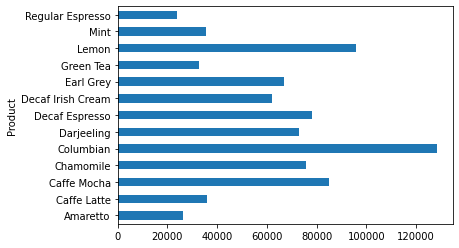

In [23]:
sales_per_product.plot.barh()

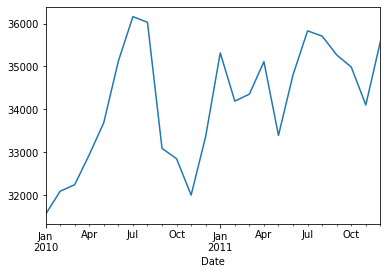

In [34]:
sales_per_day_plot = df.groupby('Date').Sales.sum().plot()


In [35]:
sales_per_day = df.groupby('Date').Sales.sum()

In [16]:
minDate = min(df['Date'])
maxDate = max(df['Date'])
print(f'A data mínima de venda foi {minDate} e a data máxima {maxDate}')

A data mínima de venda foi 2010-01-01 00:00:00 e a data máxima 2011-12-01 00:00:00


In [32]:
TopCategoria = df.groupby('Product Type').Sales.sum()


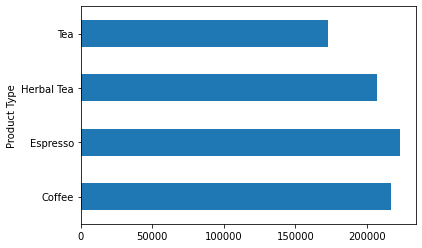

In [33]:
TopCategoriaPlot = df.groupby('Product Type').Sales.sum().plot.barh() #agrupar a dimensão productType e somar os valores de venas e plotar isso em um gráfico de barras


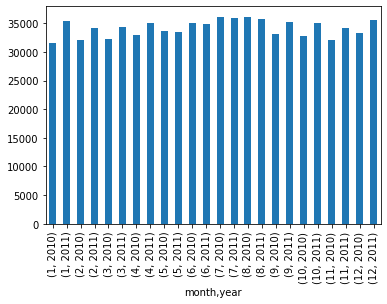

In [49]:
df.groupby(['month','year']).Sales.sum().plot.bar()

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose


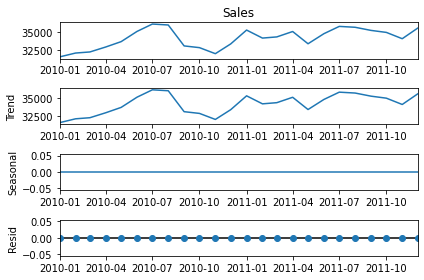

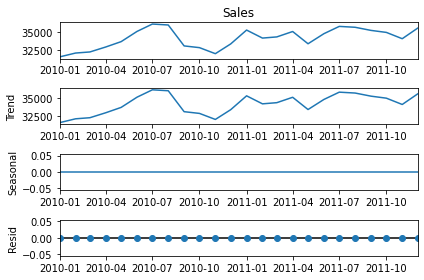

In [36]:
decompose = seasonal_decompose(sales_per_day, period=1)

decompose.plot()

# Conclusão